In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#change directory

%cd /content/drive/MyDrive/Math_6397/CH01

/content/drive/MyDrive/Math_6397/CH01


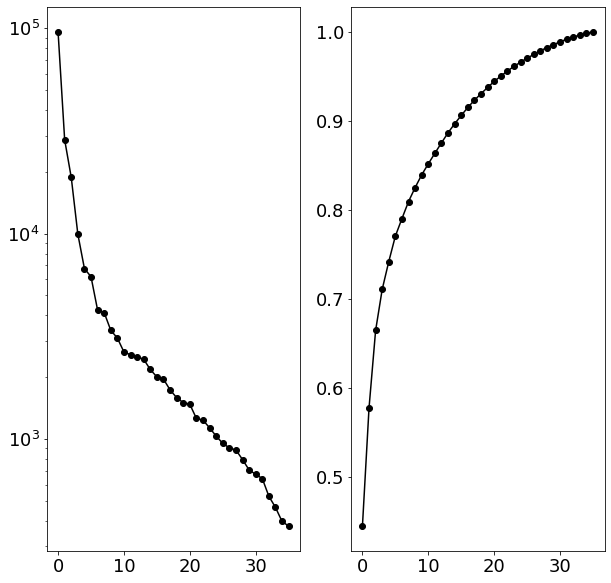

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

U, S, VT = np.linalg.svd(faces[:,:36],full_matrices=False)  #Economy svd

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')    #singular value spectra
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')


In [14]:
mos=faces[:,:36].T @ faces[:,:36]
s_mos, v_mos = np.linalg.eig(mos)
S_mos= np.sqrt(abs(s_mos))

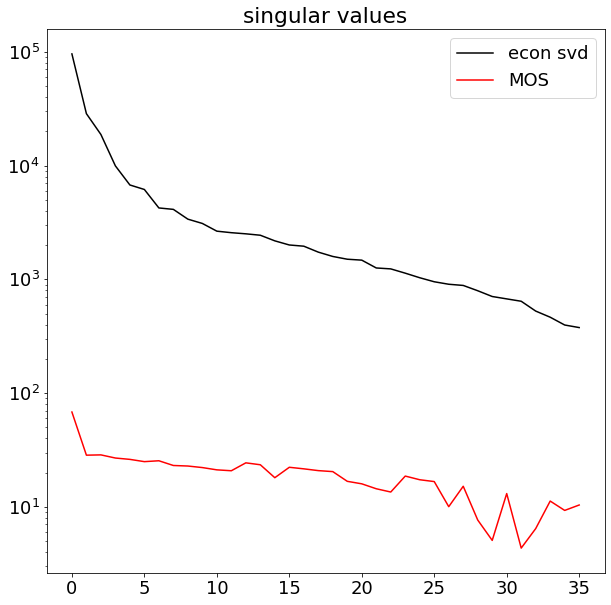

In [15]:
plt.figure
plt.plot(S,color='k', label='econ svd')
plt.plot(S_mos, color='r', label='MOS')
plt.yscale('log')
plt.title('singular values')
plt.show
plt.legend()

In [22]:
print(S)

[95944.10502369 28627.39689116 18779.09773349  9945.75617334
  6756.9299152   6167.97817017  4244.27237852  4123.62879922
  3383.01280596  3101.13919822  2652.82404025  2572.05357781
  2513.72262032  2442.90793748  2180.47655001  2005.58255407
  1956.96679152  1735.23478883  1589.74756283  1503.37626068
  1475.48316905  1259.38575635  1236.08180759  1133.39820544
  1033.20791888   952.49317044   905.71224994   884.1557904
   794.31221606   706.76980327   673.49593323   641.94921568
   526.23936481   464.75861345   396.92011491   376.83786219]


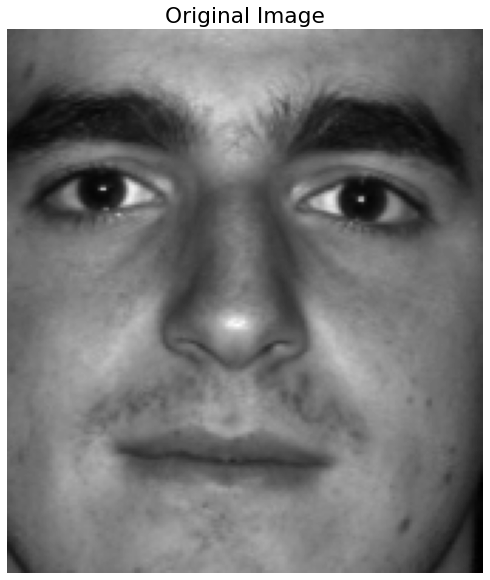

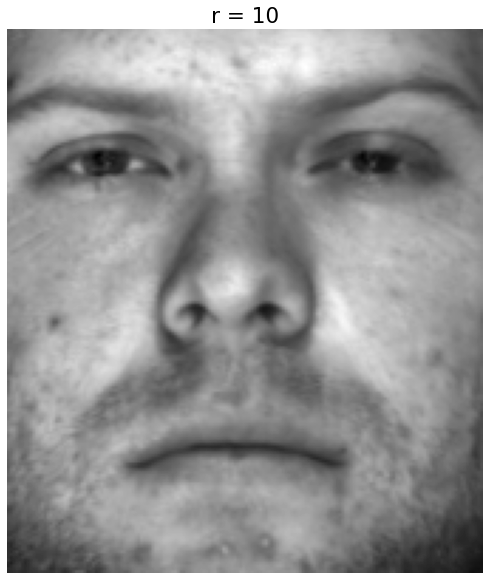

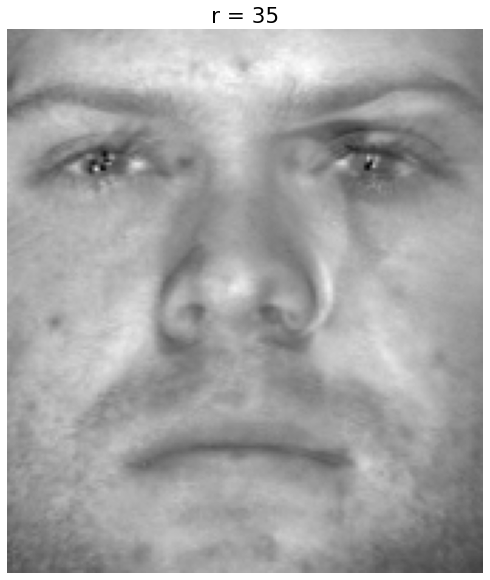

In [18]:
#compare singular value with econ svd

testFace = faces[:,np.sum(nfaces[:37])] 
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

r_list = [10, 35]

for r in r_list:
    reconFace = U[:,:r]  @ U[:,:r].T @ testFace
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

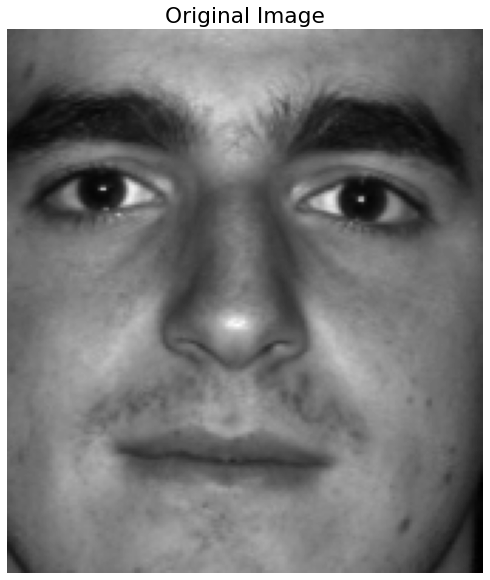

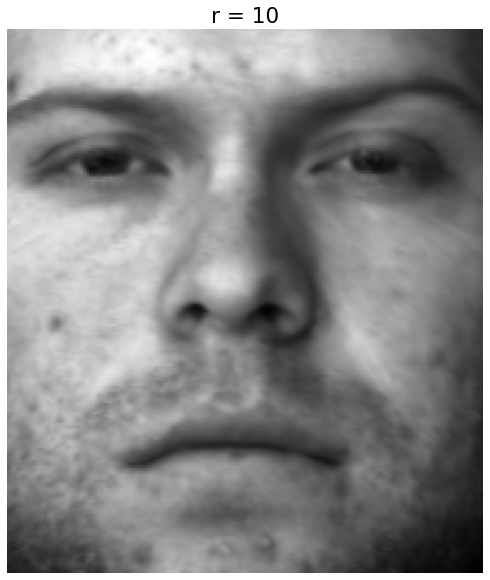

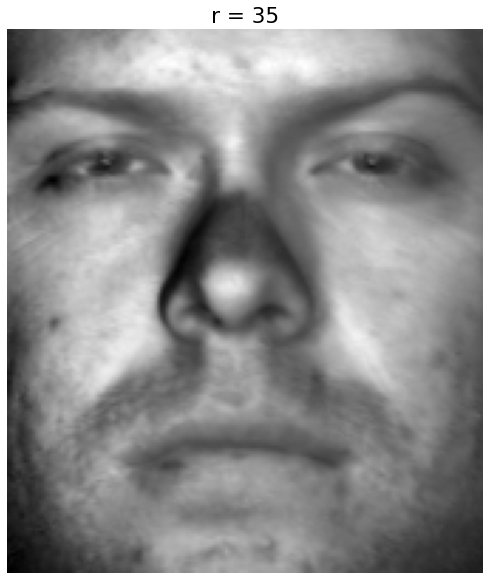

In [21]:
#singular value with MOS
U_mos=faces[:,:36] @ v_mos @ np.linalg.inv(np.diag(S_mos))

plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

r_list = [10, 35]

for r in r_list:
    reconFace2 = U_mos[:,:r]  @ U_mos[:,:r].T @ testFace
    img = plt.imshow(np.reshape(reconFace2,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()